# 고령 운전자 수 추이

In [1]:
from matplotlib import pyplot as plt
from google.oauth2 import service_account
from google.cloud import bigquery

In [24]:
credentials = service_account.Credentials.from_service_account_file("./bigquery_key.json")
client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

In [25]:
plt.rc("font", family="Malgun Gothic")

In [26]:
traffic_accident_sql = """
    SELECT
        age_group,
        SUM(total_2019) AS total_2019,
        SUM(total_2020) AS total_2020,
        SUM(total_2021) AS total_2021,
        SUM(total_2022) AS total_2022
    FROM
        `calcium-channel-428804-c3.traffic_accident.driver_license_4`
    GROUP BY
        age_group
    HAVING
        age_group = 65
"""

In [27]:
traffic_accident_df = client.query(traffic_accident_sql).to_dataframe()
traffic_accident_df = traffic_accident_df.set_index("age_group")

C:\Users\minni\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [28]:
traffic_accident_df

,total_2019,total_2020,total_2021,total_2022
age_group,,,,
65,3337165,3682632,4016538,4387358


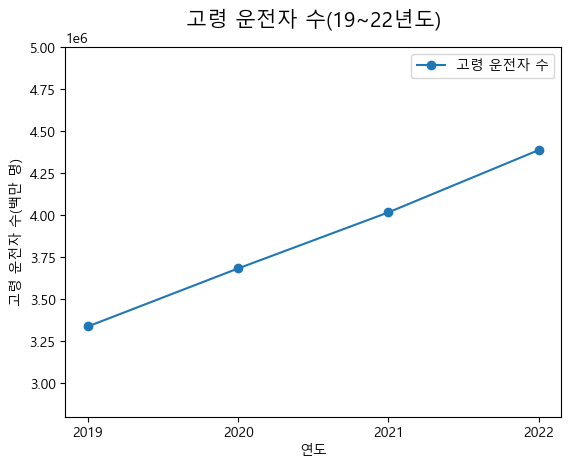

In [32]:
age_labels = ["2019", "2020", "2021", "2020"]
plt.plot(["2019", "2020", "2021", "2022"], traffic_accident_df.loc[65], marker="o", label="전체 연령")
plt.title("고령 운전자 수(19~22년도)", size=15, pad=15)
plt.xlabel("연도")
plt.ylabel("고령 운전자 수(백만 명)")
plt.xticks(rotation=0)
plt.ylim(2800000, 5000000)
plt.legend(["고령 운전자 수"], loc="best")
plt.savefig("./result/elderly_driver_v2png", bbox_inches="tight")

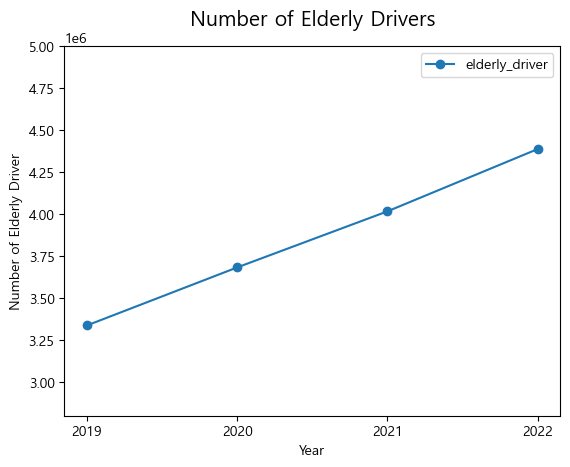

In [33]:
age_labels = ["2019", "2020", "2021", "2020"]
plt.plot(["2019", "2020", "2021", "2022"], traffic_accident_df.loc[65], marker="o", label="전체 연령")
plt.title("Number of Elderly Drivers", size=15, pad=15)
plt.xlabel("Year")
plt.ylabel("Number of Elderly Driver")
plt.xticks(rotation=0)
plt.ylim(2800000, 5000000)
plt.legend(["elderly_driver"], loc="best")
plt.savefig("./result/elderly_driver_v1png", bbox_inches="tight")